# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [42]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [43]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [44]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [45]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

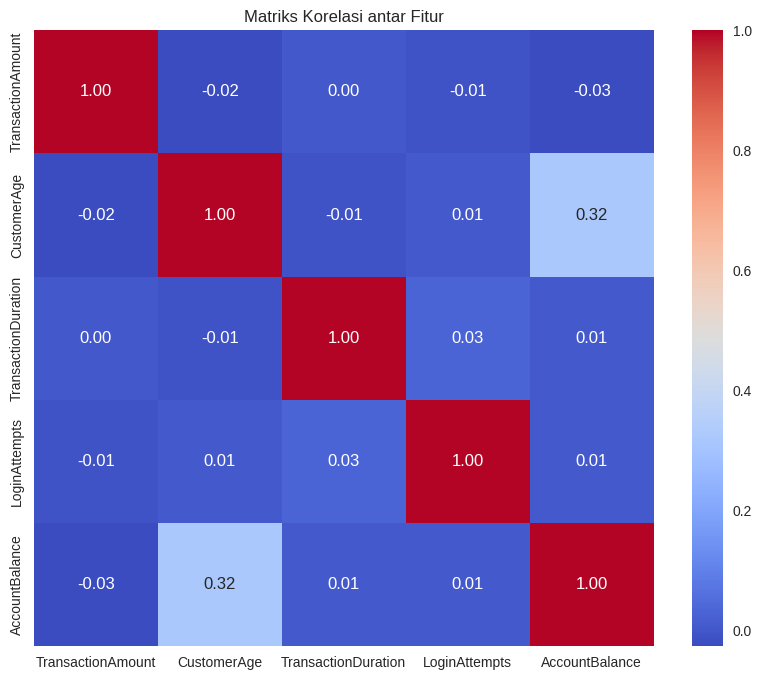

In [46]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
df_num = df.select_dtypes(include=["int64", "float64"])
corr_matrix = df_num.corr()

# Heatmap korelasi untuk semua kolom (numeric + categorical encoded)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi antar Fitur")
plt.show()

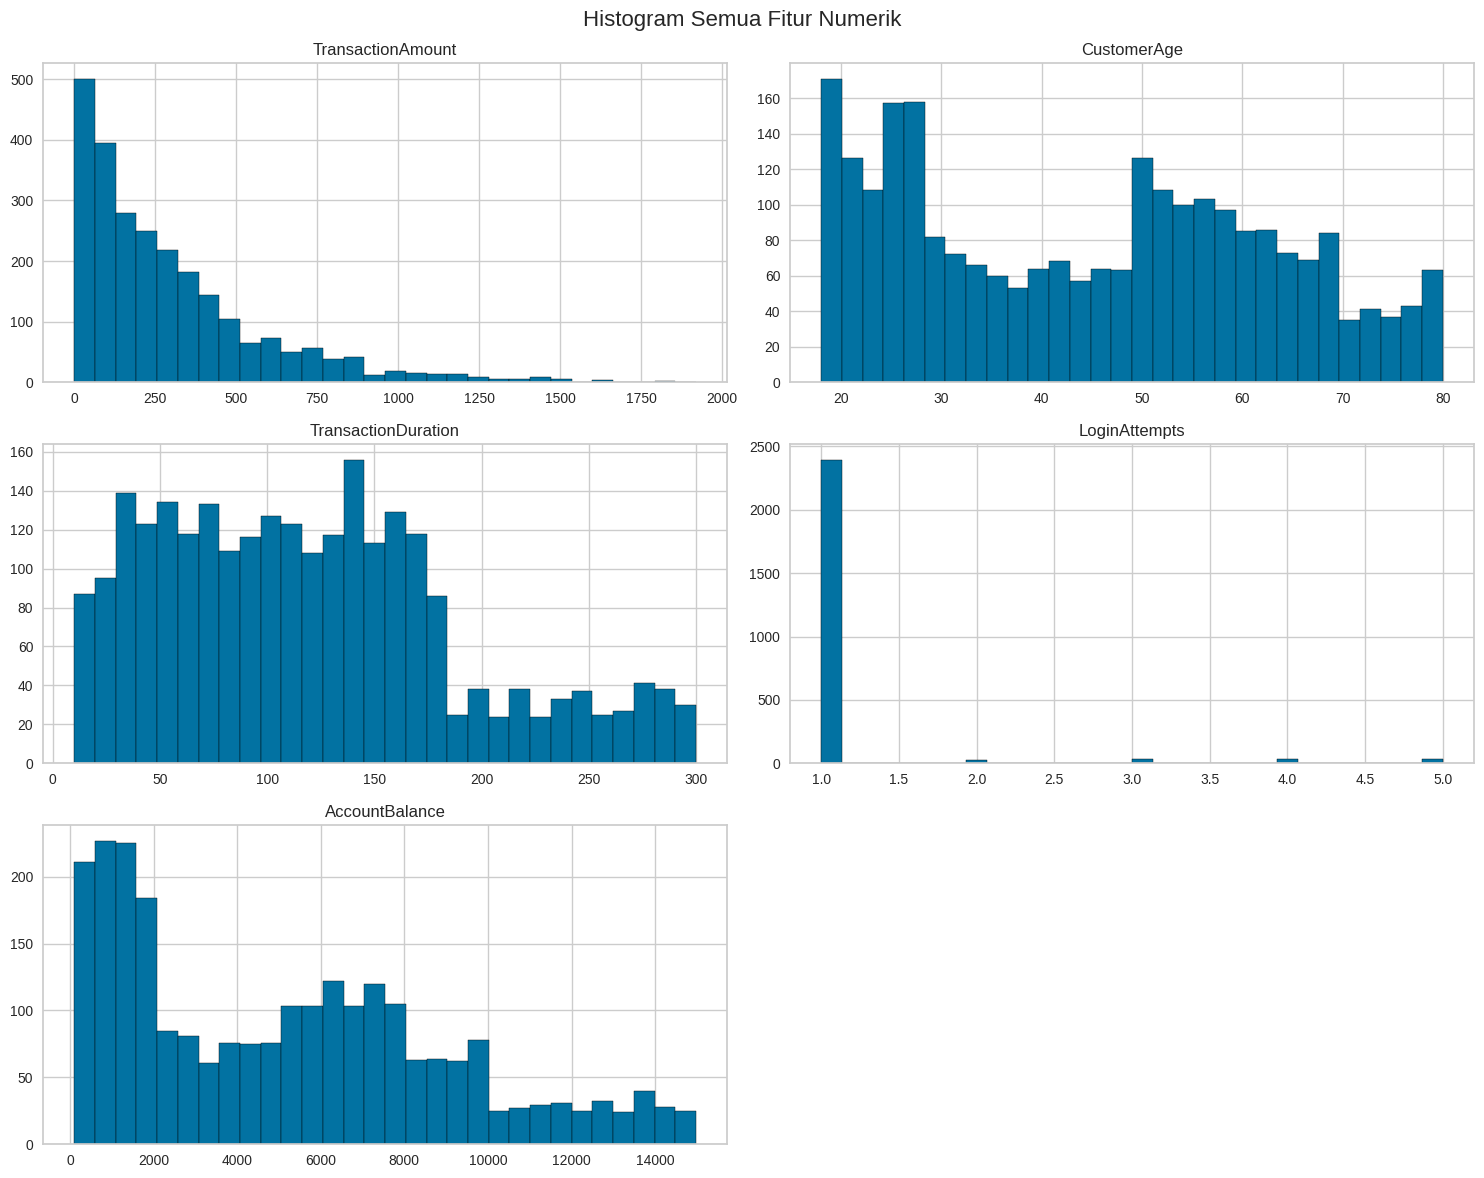

In [47]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df_num = df.select_dtypes(include=["int64", "float64"])

# Plot histogram untuk tiap kolom numerik
df_num.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Histogram Semua Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

/tmp/ipython-input-1456430598.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


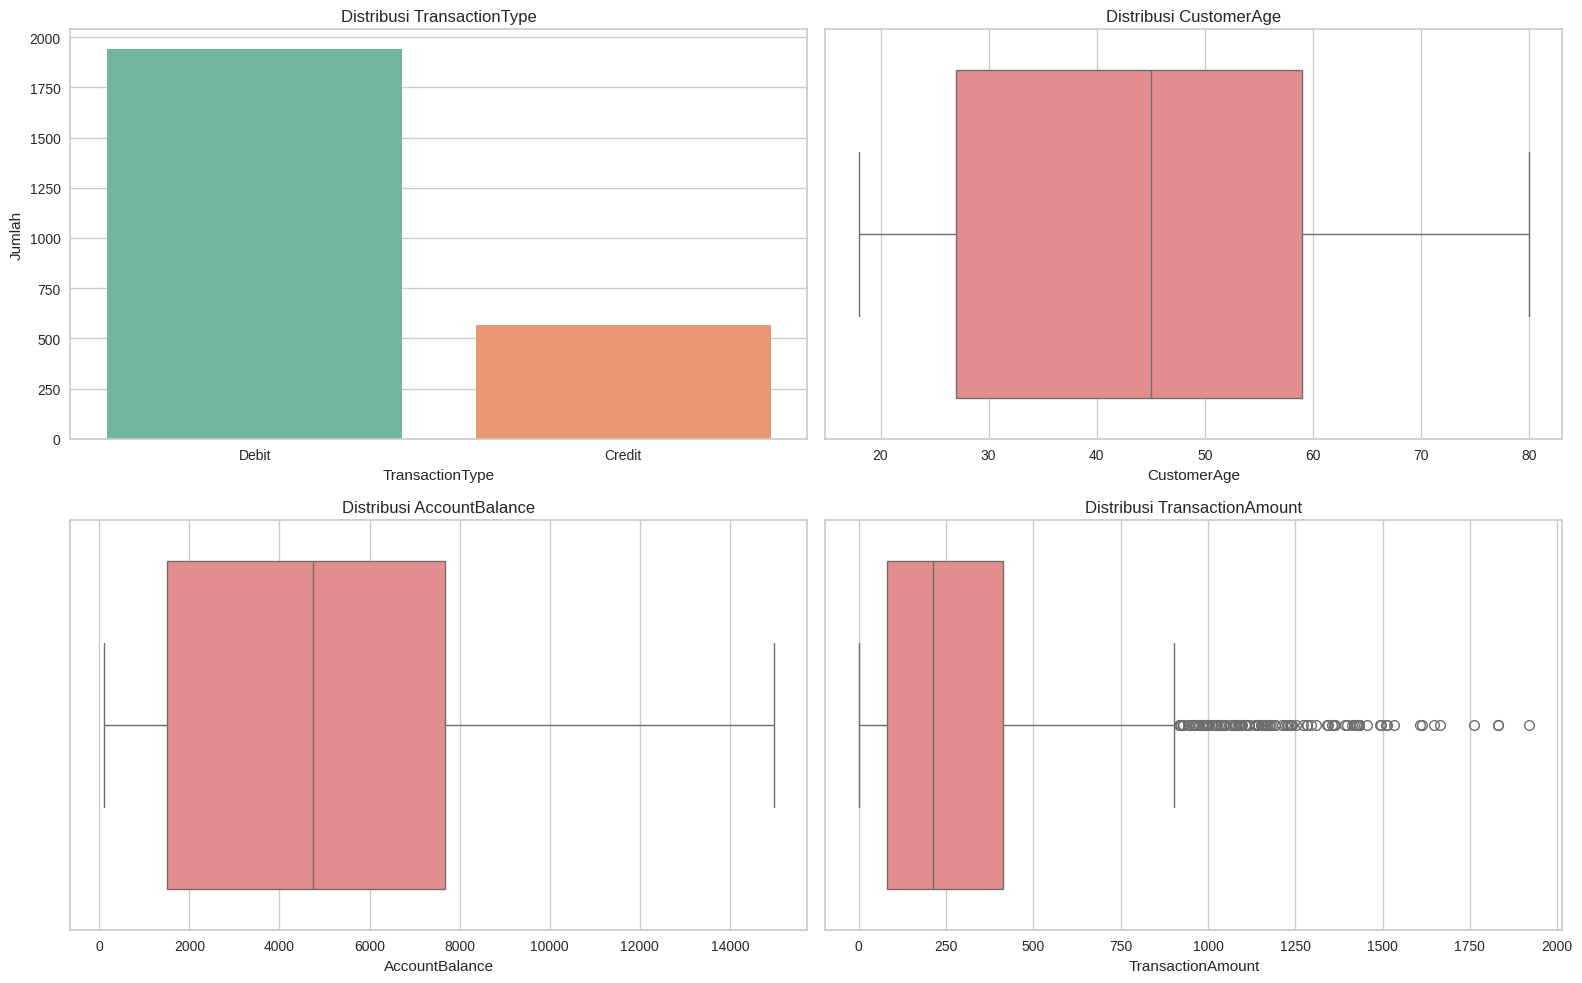

In [48]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
selected_cols = ["TransactionType", "CustomerAge", "AccountBalance", "TransactionAmount"]

plt.figure(figsize=(16, 10))

for i, col in enumerate(selected_cols, 1):
    plt.subplot(2, 2, i)

    if df[col].dtype in ["int64", "float64"]:  # numerik
        sns.boxplot(x=df[col], color="lightcoral")
        plt.xlabel(col)
    else:  # kategorik (TransactionType)
        sns.countplot(x=df[col], palette="Set2")
        plt.xlabel(col)
        plt.ylabel("Jumlah")

    plt.title(f"Distribusi {col}", fontsize=12)

plt.tight_layout()
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [49]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [50]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [51]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [52]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"], errors="ignore")
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [53]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

datetime_cols = ['TransactionDate', 'PreviousTransactionDate']
categorical_cols = [col for col in df.select_dtypes(include=["object"]).columns if col not in datetime_cols]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [54]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [55]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()

df.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [56]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [57]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
def handle_outliers_median(df, cols):
    summary = []

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # jumlah outlier sebelum handling
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        n_outliers_before = outliers.sum()

        # isi dengan median
        if n_outliers_before > 0:
            median_val = df[col].median()
            df.loc[outliers, col] = median_val

        # jumlah outlier setelah handling
        outliers_after = (df[col] < lower_bound) | (df[col] > upper_bound)
        n_outliers_after = outliers_after.sum()

        summary.append({
            "FITUR": col,
            "SEBELUM": int(n_outliers_before),
            "SESUDAH": int(n_outliers_after)})

    report = pd.DataFrame(summary)
    return df, report


# contoh penggunaan
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
df_handled, outlier_report = handle_outliers_median(df.copy(), numerical_cols)

outlier_report

,FITUR,SEBELUM,SESUDAH
0,TransactionAmount,104,0
1,TransactionType,554,0
2,Location,0,0
3,Channel,0,0
4,CustomerAge,0,0
5,CustomerOccupation,0,0
6,TransactionDuration,0,0
7,LoginAttempts,113,0
8,AccountBalance,0,0


In [58]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,

# Binning TransactionAmount
bins_amount = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels_amount = ["Sangat Kecil", "Kecil", "Sedang", "Besar", "Sangat Besar"]
df["AmountGroup"] = pd.cut(df["TransactionAmount"], bins=bins_amount, labels=labels_amount)

# Binning CustomerAge
bins_age = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels_age = ["Sangat Muda", "Muda", "Dewasa", "Paruh Baya", "Tua"]
df["AgeGroup"] = pd.cut(df["CustomerAge"], bins=bins_age, labels=labels_age)

# Encoding hasil binning dengan LabelEncoder
le_amount = LabelEncoder()
df["AmountGroup_Encoded"] = le_amount.fit_transform(df["AmountGroup"].astype(str))

le_age = LabelEncoder()
df["AgeGroup_Encoded"] = le_age.fit_transform(df["AgeGroup"].astype(str))

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AmountGroup,AgeGroup,AmountGroup_Encoded,AgeGroup_Encoded
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,Sangat Kecil,Tua,3,4
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,Sangat Kecil,Tua,3,4
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,Sangat Kecil,Sangat Muda,3,3
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,Sangat Kecil,Sangat Muda,3,3
5,0.047888,2023-04-03 17:15:01,1,28,0,0.000000,3,0.558621,0.0,0.045738,2024-11-04 08:06:36,Sangat Kecil,NaN,3,5


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [59]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AmountGroup_Encoded,AgeGroup_Encoded
count,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000
mean,0.154444,0.788756,21.424617,1.011073,0.430476,1.528535,0.378091,0.030239,0.336489,2.602641,2.043441
std,0.152255,0.437496,12.432136,0.829195,0.287711,1.154655,0.243118,0.147198,0.262597,0.925026,1.400829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042249,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.093553,3.000000,1.000000
50%,0.109899,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.309532,3.000000,2.000000
75%,0.214105,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.510548,3.000000,3.000000
max,1.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,5.000000,5.000000


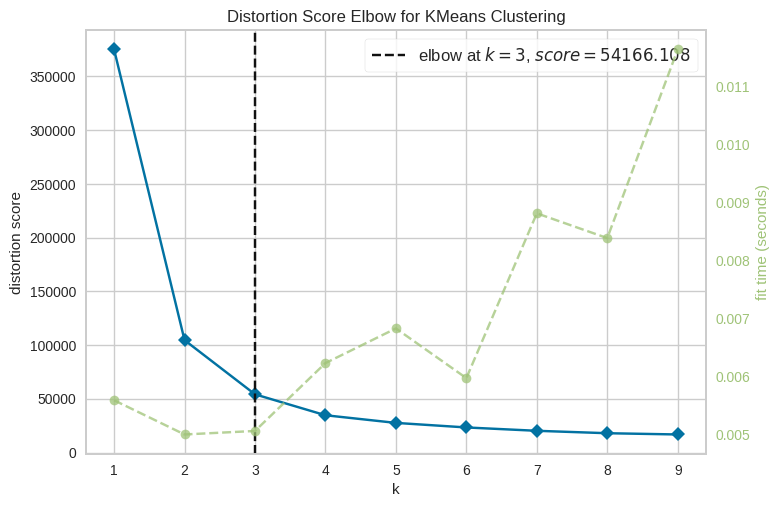

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df.select_dtypes(include=["int64", "float64"])

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)
visualizer.show()

In [61]:
# Menggunakan algoritma K-Means Clustering
X = df.select_dtypes(include=["int64", "float64"])

model_kmeans = KMeans(n_clusters=3, random_state=0)
df["Cluster"] = model_kmeans.fit_predict(X)

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AmountGroup,AgeGroup,AmountGroup_Encoded,AgeGroup_Encoded,Cluster
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,Sangat Kecil,Tua,3,4,1
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,Sangat Kecil,Tua,3,4,0
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,Sangat Kecil,Sangat Muda,3,3,0
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,Sangat Kecil,Sangat Muda,3,3,1
5,0.047888,2023-04-03 17:15:01,1,28,0,0.000000,3,0.558621,0.0,0.045738,2024-11-04 08:06:36,Sangat Kecil,NaN,3,5,1


Jalankan cell code ini untuk menyimpan model kamu.

In [62]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [63]:
# Menghitung dan menampilkan nilai Silhouette Score.
X = df.select_dtypes(include=["int64", "float64"])
score = silhouette_score(X, df["Cluster"])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5110


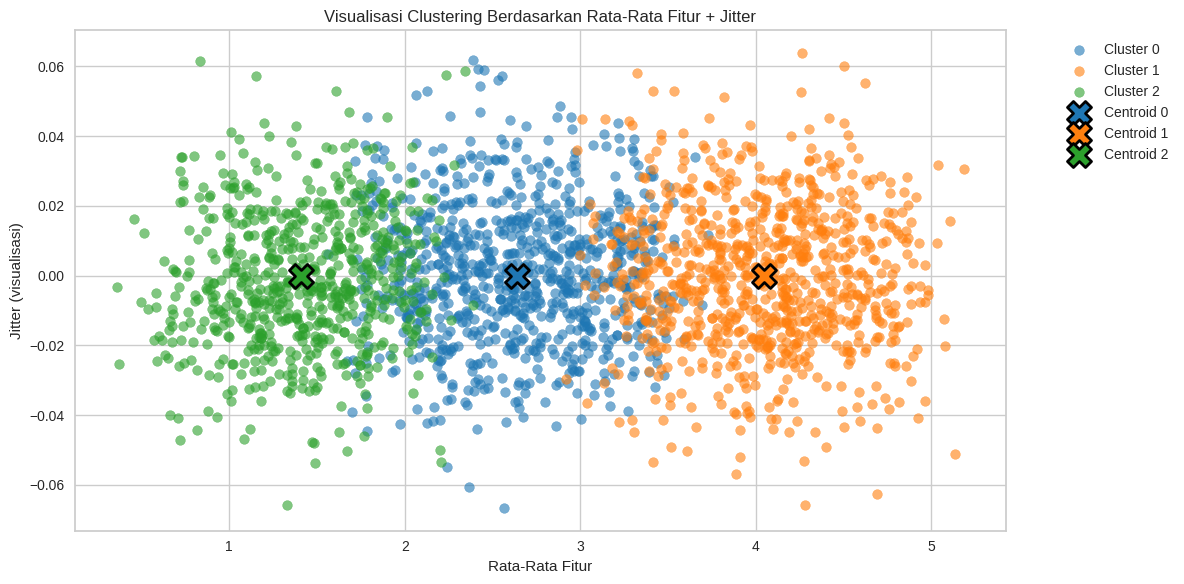

In [64]:
# Membuat visualisasi hasil clustering
data_vis = df.copy()
data_vis['Cluster'] = data_vis['Cluster'].astype(int)

numeric_features = data_vis.drop(columns=['Cluster']).select_dtypes(include=[np.number])
data_vis['mean_feature'] = numeric_features.mean(axis=1)

# Tambahkan Jitter
np.random.seed(70)
data_vis['jitter'] = np.random.normal(loc=0, scale=0.02, size=len(data_vis))

# Tentukan warna sesuai jumlah cluster
n_clusters = data_vis['Cluster'].nunique()
colors = plt.cm.tab10.colors[:n_clusters]

plt.figure(figsize=(12, 6))

# Scatter tiap cluster
for i, color in enumerate(colors):
    subset = data_vis[data_vis['Cluster'] == i]
    plt.scatter(
        subset['mean_feature'],
        subset['jitter'],
        color=color,
        alpha=0.6,
        label=f'Cluster {i}')

# Hitung centroid berdasarkan mean_feature tiap cluster
centroid_x = data_vis.groupby('Cluster')['mean_feature'].mean().values

# Buat plot centroid
for i, color in enumerate(colors):
    plt.scatter(
        centroid_x[i],
        0,
        color=color,
        edgecolor='black',
        s=300,
        marker='X',
        linewidth=2,
        label=f'Centroid {i}')

plt.title('Visualisasi Clustering Berdasarkan Rata-Rata Fitur + Jitter')
plt.xlabel('Rata-Rata Fitur')
plt.ylabel('Jitter (visualisasi)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [65]:
# Membangun model menggunakan PCA.
numeric_df = df.select_dtypes(include=[np.number])
pca_model = PCA(n_components=2)
pca_result = pca_model.fit_transform(numeric_df)

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
data_final = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(data_final)
data_final['Cluster'] = kmeans_pca.labels_

data_final.head()

,PCA1,PCA2,Cluster
0,14.565922,0.726529,1
1,-6.402705,0.606962,0
2,1.596932,1.644125,0
3,11.568853,1.650144,1
4,6.565835,3.304824,1


In [66]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca_model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [67]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Gabungkan cluster dari data_final PCA ke df asli (hanya jika ingin groupby cluster baru)
df_with_cluster = df.copy()
df_with_cluster['Target'] = data_final['Cluster']

# Analisis deskriptif dengan agregasi mean, min, max (dan tambahan median, std untuk pengalaman lebih baik)
desc_stats = (
    df_with_cluster.groupby('Target')[numeric_cols]
    .agg(['mean', 'min', 'max', 'median', 'std']))

pd.set_option("display.max_columns", None)
desc_stats

TransactionAmount                                          \
                    mean       min       max    median       std   
Target                                                             
0.0             0.159020  0.000000  0.918269  0.110754  0.154980   
1.0             0.144005  0.000031  0.779795  0.101605  0.138171   
2.0             0.161197  0.000099  1.000000  0.111671  0.166432   

       TransactionType                            Location                 \
                  mean min max median       std       mean min max median   
Target                                                                      
0.0           0.780457   0   2    1.0  0.438055  21.368020   0  43   21.0   
1.0           0.798701   0   2    1.0  0.432429  21.629870   0  43   22.0   
2.0           0.798732   0   2    1.0  0.442645  20.828843   0  43   20.0   

                    Channel                          CustomerAge            \
              std      mean min max median       std        mean  min  max   
Target                                                                       
0.0     12.406257  1.001269   0   3    1.0  0.833692    0.421606  0.0  1.0   
1.0     12.210417  1.003896   0   3    1.0  0.819931    0.441894  0.0  1.0   
2.0     12.618424  1.026941   0   3    1.0  0.838121    0.440647  0.0  1.0   

                           CustomerOccupation                           \
          median       std               mean min max median       std   
Target                                                                   
0.0     0.427419  0.289811           1.572335   0   4    2.0  1.168670   
1.0     0.451613  0.290047           1.498701   0   4    1.0  1.134916   
2.0     0.483871  0.285843           1.499208   0   4    1.0  1.151775   

       TransactionDuration                                    LoginAttempts  \
                      mean  min       max    median       std          mean   
Target                                                                        
0.0               0.368830  0.0  1.000000  0.341379  0.241241      0.033312   
1.0               0.387179  0.0  1.000000  0.370690  0.239656      0.026299   
2.0               0.389092  0.0  0.996552  0.365517  0.250535      0.034073   

                                  AccountBalance                      \
        min  max median       std           mean       min       max   
Target                                                                 
0.0     0.0  1.0    0.0  0.159666       0.335760  0.000064  0.996663   
1.0     0.0  1.0    0.0  0.131412       0.341315  0.000253  1.000000   
2.0     0.0  1.0    0.0  0.159451       0.334789  0.000774  0.997144   

                           AmountGroup_Encoded                           \
          median       std                mean min max median       std   
Target                                                                    
0.0     0.318592  0.259450            2.605330   0   5    3.0  0.936523   
1.0     0.300762  0.268357            2.615584   0   4    3.0  0.899511   
2.0     0.316861  0.260629            2.592710   0   4    3.0  0.941399   

       AgeGroup_Encoded                           
                   mean min max median       std  
Target                                            
0.0            2.032995   0   5    2.0  1.382934  
1.0            2.074026   0   5    2.0  1.430115  
2.0            2.026941   0   5    2.0  1.393034

## Karakteristik tiap cluster berdasarkan rentangnya
1. **Cluster 0**: **Nasabah dengan Transaksi Tinggi dan Stabil**

*   **Transaction Amount**:
      *  **Rata-rata**: 0.159
      *  **Median**: 0.1107
      *  **Standar Deviasi**: 0.1549
*   **Account Balance**:
      *  **Rata-rata**: 0.3357
      *  **Median**: 0.3185
      *  **Standar Deviasi**: 0.2594
*   **Login Attemps**:
      *  **Rata-rata**: 0.033
      *  **Median**: 0
      *  **Standar Deviasi**: 0.159           
* Analisis: Cluster ini merepresentasikan nasabah dengan rata-rata nominal transaksi harian sebesar 0.159 dengan median 0.1107. Nilai tersebut menunjukkan bahwa nasabah aktif menggunakan rekeningnya untuk transaksi sehari-hari, dengan nominal transaksi relatif konsisten. Rata-rata saldo akun pada cluster ini yaitu 0.335 dan standar deviasinya 0.259 menunjukkan adanya variasi yang cukup besar. Kemudian, tidak ada aktivitas percobaan login berulang karena rata-rata dan mediannya yang sangat rendah. Direkomendasikan untuk tetap memberikan benefit seperti cashback kecil dan gratis biaya administrasi supaya dapat mempertahankan loyalitas nasabah.

---

2. **Cluster 1**: **Nasabah dengan Saldo Tinggi dan Transaski Rendah**

*   **Transaction Amount**:
      *  **Rata-rata**: 0.144
      *  **Median**: 0.1016
      *  **Standar Deviasi**: 0.1381
*   **Account Balance**:
      *  **Rata-rata**: 0.3413
      *  **Median**: 0.3007
      *  **Standar Deviasi**: 0.2683
*   **Login Attemps**:
      *  **Rata-rata**: 0.026
      *  **Median**: 0
      *  **Standar Deviasi**: 0.1314          
* Analisis: Cluster ini merepresentasikan nasabah dengan rata-rata transaksi yang lebih kecil yaitu sebesar 0.144 serta median sebesar 0.1016 menandakan adanya aktivitas transaksi yang lebih stabil. Rata-rata saldo akun pada cluster ini yaitu 0.3413 dan standar deviasinya 0.2683 membuktikan bahwa adanya variasi yang cukup besar. Kemudian, tidak ada tanda aktivitas percobaan login berulang karena rata-rata dan mediannya yang sangat rendah. Direkomendasikan untuk penawaran produk keuangan lainnya seperti deposito, reksadana, atau tabungan berjangka karena pada cluster ini meyimpan dana yang lebih banyak daripada cluster lainnya

---

3. **Cluster 2**: **Nasabah dengan Transaksi Tinggi dan Potensi Risiko**

*   **Transaction Amount**:
      *  **Rata-rata**: 0.1611
      *  **Median**: 0.1116
      *  **Standar Deviasi**: 0.1664
*   **Account Balance**:
      *  **Rata-rata**: 0.3347
      *  **Median**: 0.3168
      *  **Standar Deviasi**: 0.2606
*   **Login Attemps**:
      *  **Rata-rata**: 0.034
      *  **Median**: 0
      *  **Standar Deviasi**: 0.1594           
* Analisis: Cluster ini merepresentasikan nasabah dengan jumlah transaksi yang besar dengan rata-rata sebesar 0.1611 dengan median 0.1116, namun cluster ini juga memberikan nilai transaksi maksimum sebesar 1 sehingga perlu diwaspadai. Terdapat juga variasi dalam nilai saldo akun dengan rata-rata 0.3347 dan standar deviasi 0.2606. Namun, pada percobaan login memiliki rata-rata yang lebih tinggi dari cluster lainnya yaitu sebesar 0.034. Pada cluster ini direkomendasikan untuk pencegahan terjadinya farud seperti fokus pada peningkatan sistem serta deteksi anomali dan menerapkan sistem verifikasi ulang.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [68]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
if 'Target' not in df_with_cluster.columns:
    df_with_cluster['Target'] = data_final['Cluster']
    print("Kolom cluster ditambahkan sebagai 'Target'")
else:
    print("Kolom cluster sudah bernama 'Target'")

df_with_cluster.head()

Kolom cluster sudah bernama 'Target'


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AmountGroup,AgeGroup,AmountGroup_Encoded,AgeGroup_Encoded,Cluster,Target
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,Sangat Kecil,Tua,3,4,1,1.0
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,Sangat Kecil,Tua,3,4,0,0.0
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,Sangat Kecil,Sangat Muda,3,3,0,0.0
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,Sangat Kecil,Sangat Muda,3,3,1,1.0
5,0.047888,2023-04-03 17:15:01,1,28,0,0.000000,3,0.558621,0.0,0.045738,2024-11-04 08:06:36,Sangat Kecil,NaN,3,5,1,1.0


In [69]:
# Simpan Data
df_with_cluster.to_csv("data_clustering.csv", index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [70]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

df_inverse = df.copy()

numerical_cols_for_inverse = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
df_inverse[numerical_cols_for_inverse] = scaler.inverse_transform(df_inverse[numerical_cols_for_inverse])

df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AmountGroup,AgeGroup,AmountGroup_Encoded,AgeGroup_Encoded,Cluster
0,14.09,2023-04-11 16:29:14,1,36,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,Sangat Kecil,Tua,3,4,1
1,376.24,2023-06-27 16:44:19,1,15,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,Sangat Kecil,Tua,3,4,0
2,126.29,2023-07-10 18:16:08,1,23,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,Sangat Kecil,Sangat Muda,3,3,0
3,184.50,2023-05-05 16:32:11,1,33,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,Sangat Kecil,Sangat Muda,3,3,1
5,92.15,2023-04-03 17:15:01,1,28,0,18.0,3,172.0,1.0,781.68,2024-11-04 08:06:36,Sangat Kecil,NaN,3,5,1


In [71]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head

for col, le in label_encoders.items():
    if df_inverse[col].dtype in ['int32', 'int64', 'float64']:
        df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))

df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AmountGroup,AgeGroup,AmountGroup_Encoded,AgeGroup_Encoded,Cluster
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Sangat Kecil,Tua,3,4,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Sangat Kecil,Tua,3,4,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Sangat Kecil,Sangat Muda,3,3,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Sangat Kecil,Sangat Muda,3,3,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,Sangat Kecil,NaN,3,5,1


In [72]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
# Pisahkan fitur numerik dan kategorikal setelah inverse
num_cols = df_inverse.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_inverse.select_dtypes(exclude=[np.number]).columns.tolist()

if "Target" not in df_inverse.columns:
    df_inverse["Target"] = df_with_cluster["Target"]

# Analisis deskriptif untuk numerik
desc_num = (
    df_inverse.groupby("Target")[num_cols]
    .agg(["mean", "min", "max", "median", "std"]))

pd.set_option("display.max_columns", None)
display(desc_num)

# Analisis deskriptif untuk kategorikal
def mode_func(x):
    return x.mode().iloc[0] if not x.mode().empty else np.nan

desc_cat = df_inverse.groupby("Target")[cat_cols].agg(mode_func)

pd.set_option("display.max_columns", None)
display(desc_cat)


TransactionAmount                                     CustomerAge  \
                    mean   min      max   median         std        mean   
Target                                                                     
0.0           305.395241  0.26  1762.28  212.780  297.382763   44.139594   
1.0           276.584935  0.32  1496.57  195.225  265.129079   45.397403   
2.0           309.572536  0.45  1919.11  214.540  319.357866   45.320127   

                                     TransactionDuration                      \
         min   max median        std                mean   min    max median   
Target                                                                         
0.0     18.0  80.0   44.5  17.968299          116.960660  10.0  300.0  109.0   
1.0     18.0  80.0   46.0  17.982884          122.281818  10.0  300.0  117.5   
2.0     18.0  80.0   48.0  17.722255          122.836767  10.0  299.0  116.0   

                  LoginAttempts                            AccountBalance  \
              std          mean  min  max median       std           mean   
Target                                                                      
0.0     69.960034      1.133249  1.0  5.0    1.0  0.638662    5096.258756   
1.0     69.500108      1.105195  1.0  5.0    1.0  0.525648    5178.904961   
2.0     72.655134      1.136292  1.0  5.0    1.0  0.637802    5081.820998   

                                                AmountGroup_Encoded          \
           min       max    median          std                mean min max   
Target                                                                        
0.0     102.20  14928.35  4840.855  3859.765033            2.605330   0   5   
1.0     105.01  14977.99  4575.605  3992.283499            2.615584   0   4   
2.0     112.76  14935.50  4815.110  3877.311291            2.592710   0   4   

                        AgeGroup_Encoded                            Cluster  \
       median       std             mean min max median       std      mean   
Target                                                                        
0.0       3.0  0.936523         2.032995   0   5    2.0  1.382934  0.937817   
1.0       3.0  0.899511         2.074026   0   5    2.0  1.430115  0.909091   
2.0       3.0  0.941399         2.026941   0   5    2.0  1.393034  0.941363   

                                 
       min max median       std  
Target                           
0.0      0   2    1.0  0.798627  
1.0      0   2    1.0  0.794680  
2.0      0   2    1.0  0.809498

,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate,AmountGroup,AgeGroup
Target,,,,,,,,
0.0,2023-01-02 16:01:14,Debit,San Diego,Branch,Student,2024-11-04 08:09:24,Sangat Kecil,Sangat Muda
1.0,2023-01-02 16:00:06,Debit,Denver,Branch,Doctor,2024-11-04 08:06:37,Sangat Kecil,Sangat Muda
2.0,2023-01-02 16:07:17,Debit,Austin,Branch,Doctor,2024-11-04 08:06:44,Sangat Kecil,Sangat Muda


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0**: **Pelajar dan Mahasiswa dengan Transaksi Tinggi**

*   **Rata-rata Transaction Amount:** 305.39
*   **Rata-rata Account Balance:** 5096.25
*   **Rata-rata Login Attemps:** 1.133
*   **Transaction Type:** Debit
*   **Customer Occupation:** Student          
* Analisis: Cluster ini didominasi oleh pelajar dan mahasiswa dengan *age group* yang sangat muda. Rata-rata banyak transaksi pada cluster ini yaitu kurang lebih 305 dengan nominal yang kecil. Transaksi mayoritas menggunakan debit dan dilakukan di cabang yang berpusat di San Diego. Direkomendasikan untuk pemberian cashback kecil dan gratis biaya admin, serta memberikan fasilitas mobile banking untuk memudahkan akses.

---

2. **Cluster 1**: **Profesional dengan Saldo Tinggi**

*   **Rata-rata Transaction Amount:** 276.58
*   **Rata-rata Account Balance:** 5178.90
*   **Rata-rata Login Attemps:** 1.105
*   **Transaction Type:** Debit
*   **Customer Occupation:** Doctor          
* Analisis: Cluster ini berisikan dokter yang berlokasi di Denver. Cluster ini memiliki rata-rata jumlah saldo tertinggi sebesar 5178 dengan jumlah transaksi rata-rata yaitu kurang lebih 276. Transaksi mayoritas dilakukan di cabang dengan menggunakan debit. Direkomendasikan produk keuagan lainnya seperti investasi, deposito, atau tabungan berjangka. Serta, memberikan penawaran kartu kredit atau layanan premium lainnya.

---

3. **Cluster 2**: **Dokter dengan Transaksi Tinggi**

*   **Rata-rata Transaction Amount:** 309.57
*   **Rata-rata Account Balance:** 5081.82
*   **Rata-rata Login Attemps:** 1.136
*   **Transaction Type:** Debit
*   **Customer Occupation:** Doctor          
* Analisis: Cluster ini berisikan dokter dengan didominasi oleh aktivitas transaksi yang tinggi yaitu kurang lebih 309 dengan nominal transaksi yang lebih besar. Cluster ini memiliki rata-rata jumlah saldo sebesar 5081.82. Transaksi mayoritas menggunakan debit dan dilakukan di cabang yang berpusat di Austin. Direkomendasikan penawaran produk asuransi kesehatan atau personal, serta penawaran program loyalty.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [73]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse_with_cluster = df_inverse.copy()

if "Target" not in df_inverse_with_cluster.columns:
    df_inverse_with_cluster["Target"] = df_with_cluster["Target"]

In [74]:
# Simpan Data
df_inverse_with_cluster.to_csv("data_clustering_inverse.csv", index=False)